In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
use_of_force_file = pd.ExcelFile("supplement_data/use_of_force_data.xlsx")

In [4]:
force_levels = pd.read_excel(use_of_force_file, 'Force Type')

In [5]:
force_levels.head()

,UOF DATE,INCIDENT NUMBER,REPORT NUMBER,EMPLOYEE NUMBER,SUBJECT NUMBER,FORCE DESC,FORCE USED OTHER
0,2015-01-01,UOF-2015-0034,150000102,17169.0,NaN,UNKNOWN,NaN
1,2015-01-02,UOF-2015-0003,150003128,12294.0,NaN,UNKNOWN,NaN
2,2015-01-02,UOF-2015-0003,150003128,13423.0,NaN,UNKNOWN,NaN
3,2015-01-02,UOF-2015-0010,150003071,10782.0,NaN,UNKNOWN,NaN
4,2015-01-02,UOF-2015-0010,150003071,12281.0,NaN,UNKNOWN,NaN


In [6]:
#swtich dates to datetime
force_levels['UOF DATE']= pd.to_datetime(force_levels['UOF DATE'])

In [7]:
force_levels["FORCE DESC"].value_counts()

Pointing of Firearms     7468
Physical Control         2965
Strike by Object/Fist    1150
UNKNOWN                   974
Impact Weapon             301
OC                        210
ERIW                      146
Other                     114
Firearm                    45
Spike Strips               31
Carotid                    14
Vehicle Deflection          4
K-9                         2
Name: FORCE DESC, dtype: int64

In [9]:
force_levels.groupby([force_levels['UOF DATE'].dt.year]).count()

,UOF DATE,INCIDENT NUMBER,REPORT NUMBER,EMPLOYEE NUMBER,SUBJECT NUMBER,FORCE DESC,FORCE USED OTHER
UOF DATE,,,,,,,
2015,1102,1102,1099,1097,133,1102,3
2016,3747,3747,3747,3747,3747,3747,35
2017,3160,3160,3160,3160,3160,3160,46
2018,2713,2713,2713,2713,2713,2713,49
2019,1987,1987,1987,1987,1987,1987,17
2020,715,715,715,715,715,715,16


In [18]:
force_analysis["INCIDENT NUMBER"].count()

UOF DATE  FORCE DESC           
2015      ERIW                        1
          Firearm                     9
          Impact Weapon               2
          OC                          5
          Physical Control           23
          Pointing of Firearms       79
          Strike by Object/Fist       9
          UNKNOWN                   974
2016      Carotid                    14
          ERIW                       27
          Firearm                     5
          Impact Weapon              96
          OC                         50
          Other                      25
          Physical Control          688
          Pointing of Firearms     2605
          Strike by Object/Fist     234
          Vehicle Deflection          3
2017      ERIW                       32
          Firearm                     8
          Impact Weapon              47
          K-9                         1
          OC                         34
          Other                      39
        

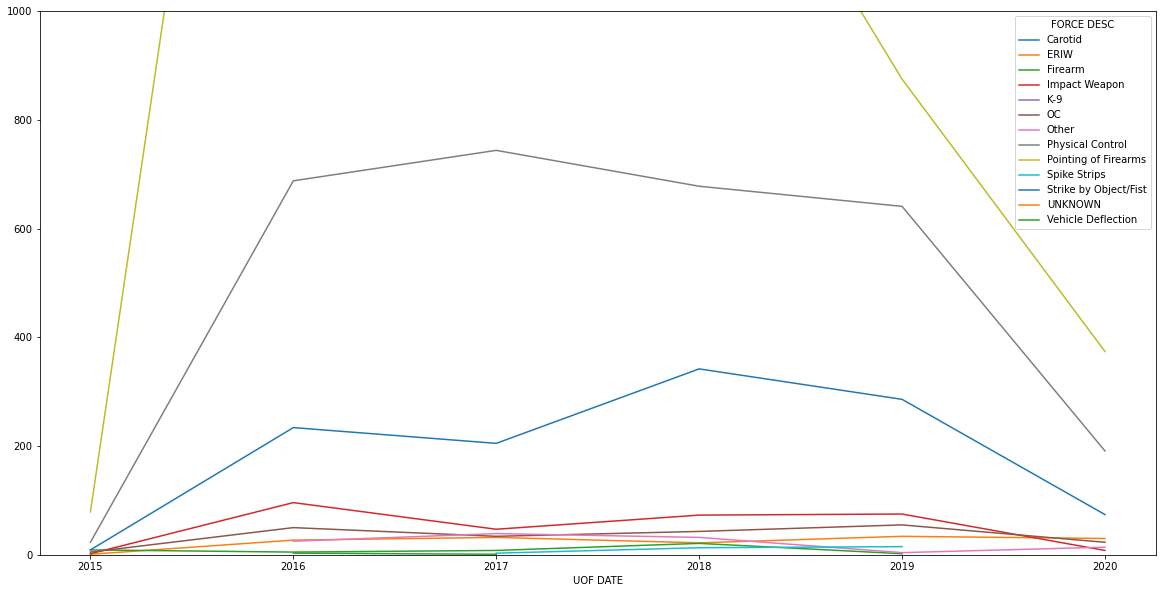

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=0)
ax.set_ylim(top=1000)

force_analysis.count()["INCIDENT NUMBER"].unstack().plot(ax=ax)

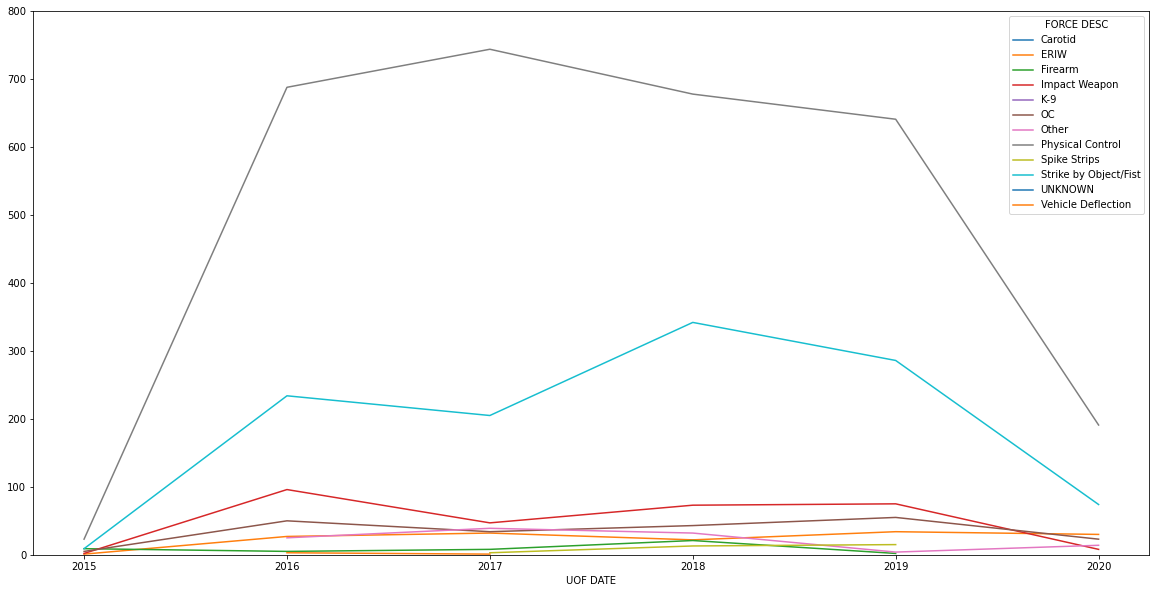

In [10]:
force_levels_without_pointing = force_levels[force_levels["FORCE DESC"] != "Pointing of Firearms"]

force_analysis_without = force_levels_without_pointing.groupby([force_levels_without_pointing['UOF DATE'].dt.year, force_levels_without_pointing["FORCE DESC"]])

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(bottom=0)
ax.set_ylim(top=800)

force_analysis_without.count()["INCIDENT NUMBER"].unstack().plot(ax=ax)

In [11]:
force_levels_without_pointing.groupby([force_levels['UOF DATE'].dt.year]).count()

,UOF DATE,INCIDENT NUMBER,REPORT NUMBER,EMPLOYEE NUMBER,SUBJECT NUMBER,FORCE DESC,FORCE USED OTHER
UOF DATE,,,,,,,
2015,1023,1023,1021,1018,54,1023,3
2016,1142,1142,1142,1142,1142,1142,31
2017,1114,1114,1114,1114,1114,1114,45
2018,1224,1224,1224,1224,1224,1224,47
2019,1112,1112,1112,1112,1112,1112,17
2020,341,341,341,341,341,341,15


In [15]:
demos = pd.read_excel(use_of_force_file, 'Subject')

In [16]:
demos.head()

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,SUBJECT NUMBER,SUBJECT RACE,SUBJECT AGE,SUBJECT SEX,WEAPON TYPE,TYPE OF WEAPON(OTHER),COMPLAINT OF PAIN,SUBJECT INJURED,CHARGES
0,UOF-2015-0034,150000102,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UOF-2015-0003,150003128,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UOF-2015-0010,150003071,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UOF-2015-0004,150004916,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UOF-2015-0005,150008112,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
demos['UOF DATE']= pd.to_datetime(demos['UOF DATE'])

In [19]:
demos.groupby([demos['UOF DATE'].dt.year, demos['SUBJECT RACE']]).count()

INCIDENT NUMBER  REPORT NUMBER  \
UOF DATE SUBJECT RACE                                                    
2015     A - Asian or Pacific Islander                6              6   
         B - Black                                   27             27   
         H - Hispanic                                18             17   
         I - American Indian                          1              1   
         U - Unknown                                  1              1   
         W - White                                   25             24   
2016     A - Asian or Pacific Islander              139            139   
         B - Black                                  786            786   
         H - Hispanic                               391            391   
         I - American Indian                          1              1   
         U - Unknown                                 44             44   
         W - White                                  411            411   
2017     A - Asian or Pacific Islander               87             87   
         B - Black                                  667            667   
         H - Hispanic                               361            361   
         U - Unknown                                 59             59   
         W - White                                  396            396   
2018     A - Asian or Pacific Islander               84             84   
         B - Black                                  616            616   
         H - Hispanic                               294            294   
         U - Unknown                                 56             56   
         W - White                                  415            415   
2019     A - Asian or Pacific Islander               53             53   
         B - Black                                  471            471   
         H - Hispanic                               247            247   
         I - American Indian                          2              2   
         U - Unknown                                 38             38   
         W - White                                  290            290   
2020     A - Asian or Pacific Islander               15             15   
         B - Black                                  146            146   
         H - Hispanic                               102            102   
         I - American Indian                          1              1   
         U - Unknown                                 15             15   
         W - White                                  105            105   

                                        UOF DATE  SUBJECT NUMBER  SUBJECT AGE  \
UOF DATE SUBJECT RACE                                                           
2015     A - Asian or Pacific Islander         6               6            1   
         B - Black                            27              27           18   
         H - Hispanic                         18              18            7   
         I - American Indian                   1               1            1   
         U - Unknown                           1               1            1   
         W - White                            25              25           15   
2016     A - Asian or Pacific Islander       139             139          139   
         B - Black                           786             786          782   
         H - Hispanic                        391             391          386   
         I - American Indian                   1               1            1   
         U - Unknown                          44              44           44   
         W - White                           411             411          408   
2017     A - Asian or Pacific Islander        87              87           86   
         B - Black                           667             667          650   
         H - Hispanic                        361             361          350  

In [20]:
demos['SUBJECT RACE'].value_counts()

B - Black                        2713
W - White                        1642
H - Hispanic                     1413
A - Asian or Pacific Islander     384
U - Unknown                       213
I - American Indian                 5
Name: SUBJECT RACE, dtype: int64

In [21]:
len(demos)7074

7074

In [ ]:
demos['SUBJECT RACE']